## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.
2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.
5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.
6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [76]:
# Tu código va aquí
# 1. Lee los archivos para `movies`, `ratings` y `users`.

# Cargamos librerías
import pandas as pd

# Cargamos los archivos
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv', index_col= 0)
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', index_col= 0, sep= '$')
users = pd.read_csv('../../Datasets/MovieLens/users-full.csv', index_col= 0)


In [77]:
ratings.head(3)

,movie_id,rating,timestamp
user_id,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968


In [78]:
movies.head(3)

,title,genres
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [79]:
users.head(3)

,gender,age_id,age_range,occupation_id,occupation,cp
user_id,,,,,,
1,F,1,Under 18,10,K-12 student,48067
2,M,56,56+,16,self-employed,70072
3,M,25,25-34,15,scientist,55117


In [80]:
# 2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, 
# para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
ratings_full = pd.merge(ratings, users['occupation'], left_on='user_id', right_index= True )

ratings_full.head()


,movie_id,rating,timestamp,occupation
user_id,,,,
1,1193,5,978300760,K-12 student
1,661,3,978302109,K-12 student
1,914,3,978301968,K-12 student
1,3408,4,978300275,K-12 student
1,2355,5,978824291,K-12 student


In [81]:
# 3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
# Vamos a ver todas las ocupaciones
ratings_full['occupation'].unique()

array(['K-12 student', 'self-employed', 'scientist',
       'executive/managerial', 'writer', 'homemaker', 'academic/educator',
       'programmer', 'technician/engineer', 'other or not specified',
       'clerical/admin', 'sales/marketing', 'college/grad student',
       'lawyer', 'farmer', 'unemployed', 'artist', 'tradesman/craftsman',
       'customer service', 'retired', 'doctor/health care'], dtype=object)

In [82]:
ratings_filtrado = ratings_full[ratings_full['occupation'] == 'scientist']

ratings_filtrado.head()

,movie_id,rating,timestamp,occupation
user_id,,,,
3,3421,4,978298147,scientist
3,1641,2,978298430,scientist
3,648,3,978297867,scientist
3,1394,4,978298147,scientist
3,3534,3,978297068,scientist


In [83]:
# 4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` 
# para tener la información de los nombres de las películas que fueron evaluadas por científicos.
rating_filtrado_titulos = pd.merge(ratings_filtrado, movies['title'], left_on= 'movie_id', right_index= True)

rating_filtrado_titulos.head()


,movie_id,rating,timestamp,occupation,title
user_id,,,,,
3,3421,4,978298147,scientist,Animal House (1978)
3,1641,2,978298430,scientist,"Full Monty, The (1997)"
3,648,3,978297867,scientist,Mission: Impossible (1996)
3,1394,4,978298147,scientist,Raising Arizona (1987)
3,3534,3,978297068,scientist,28 Days (2000)


In [84]:
# 5. Filtra tu `DataFrame` para quedarte **solamente** con 
# las películas que fueron evaluadas más de 50 veces.
ratings_50 = rating_filtrado_titulos[rating_filtrado_titulos.index.value_counts() > 50]
ratings_50.head()


/tmp/ipykernel_37054/627954064.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings_50 = rating_filtrado_titulos[rating_filtrado_titulos.index.value_counts() > 50]


,movie_id,rating,timestamp,occupation,title
user_id,,,,,
3,3421,4,978298147,scientist,Animal House (1978)
3,1641,2,978298430,scientist,"Full Monty, The (1997)"
3,648,3,978297867,scientist,Mission: Impossible (1996)
3,1394,4,978298147,scientist,Raising Arizona (1987)
3,3534,3,978297068,scientist,28 Days (2000)


In [85]:
print('El tamaño antes del filtrado es: ',rating_filtrado_titulos.shape)
print('El tamaño despues del filtrado es: ',ratings_50.shape)

El tamaño antes del filtrado es:  (22951, 5)
El tamaño despues del filtrado es:  (21821, 5)


In [86]:
# 6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
ratings_new = ratings_50[['movie_id', 'title', 'rating', 'timestamp', 'occupation']]
ratings_new

,movie_id,title,rating,timestamp,occupation
user_id,,,,,
3,3421,Animal House (1978),4,978298147,scientist
3,1641,"Full Monty, The (1997)",2,978298430,scientist
3,648,Mission: Impossible (1996),3,978297867,scientist
3,1394,Raising Arizona (1987),4,978298147,scientist
3,3534,28 Days (2000),3,978297068,scientist
...,...,...,...,...,...
6036,562,Welcome to the Dollhouse (1995),4,956752417,scientist
6036,1096,Sophie's Choice (1982),4,956712474,scientist
6036,1097,E.T. the Extra-Terrestrial (1982),4,956712981,scientist


In [87]:
rating_mean = ratings_new.groupby(['movie_id', 'title']).mean('rating')
rating_mean

,,rating,timestamp
movie_id,title,,
1,Toy Story (1995),4.115385,9.713167e+08
2,Jumanji (1995),3.526316,9.719361e+08
3,Grumpier Old Men (1995),2.888889,9.701152e+08
4,Waiting to Exhale (1995),2.500000,9.811431e+08
5,Father of the Bride Part II (1995),2.000000,9.745461e+08
...,...,...,...
3937,Runaway (1984),3.000000,9.741615e+08
3943,Bamboozled (2000),4.000000,9.959482e+08
3948,Meet the Parents (2000),3.500000,9.802991e+08


In [88]:
# 7. Ordena la `Serie` resultante descendentemente y asígnala  
# a la variable `mean_of_scientists_ratings_sorted`.
mean_of_scientists_ratings_sorted = rating_mean.sort_values('rating', ascending= False)
mean_of_scientists_ratings_sorted

,,rating,timestamp
movie_id,title,,
2239,Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975),5.0,963682057.0
3713,"Long Walk Home, The (1990)",5.0,974764310.0
53,Lamerica (1994),5.0,969062964.0
3415,"Mirror, The (Zerkalo) (1975)",5.0,969061023.0
665,Underground (1995),5.0,969064293.0
...,...,...,...
2704,"Lovers on the Bridge, The (Les Amants du Pont-Neuf) (1991)",1.0,974817242.0
502,"Next Karate Kid, The (1994)",1.0,959821571.0
496,What Happened Was... (1994),1.0,974769807.0


Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

In [89]:
mean_of_scientists_ratings_sorted = mean_of_scientists_ratings_sorted.reset_index()

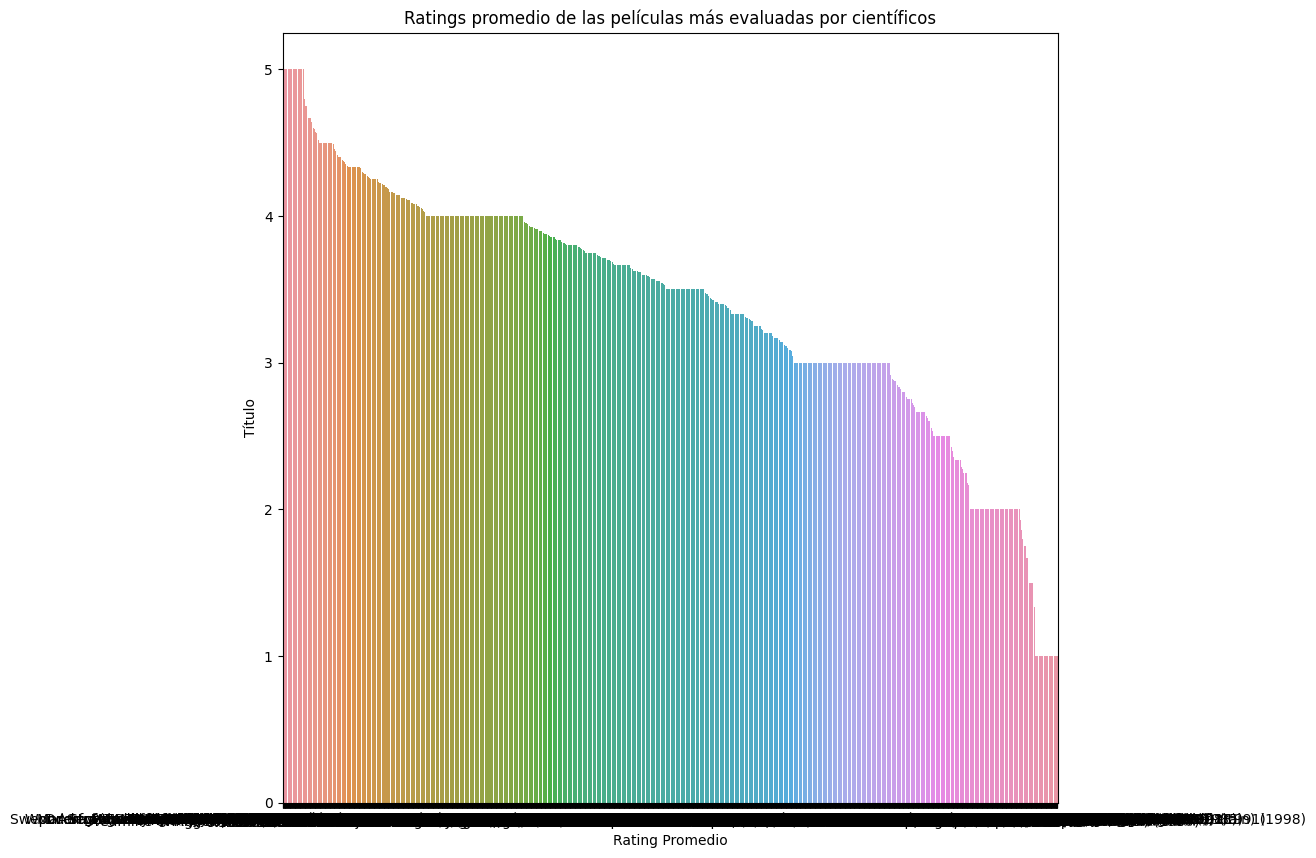

In [90]:
# Pega aquí la función de verificación 
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(data=mean_of_scientists_ratings_sorted, x='title', y='rating', ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

visualizar_lista(mean_of_scientists_ratings_sorted)

<details><summary>Solución</summary>

```python
movies = pd.read_csv('../../Datasets/MovieLens/movies-separated_by_money-raw.csv', sep='$', index_col=0)
ratings = pd.read_csv('../../Datasets/MovieLens/ratings-raw.csv')
users = pd.read_csv('../../Datasets/MovieLens/users-full.csv')
ratings_with_occupation = pd.merge(ratings, users['occupation'], left_on='user_id', right_index=True)
only_scientists = ratings_with_occupation[ratings_with_occupation['occupation'] == 'scientist']
only_scientist_with_movie_title = pd.merge(only_scientists, movies['title'], left_on='movie_id', right_index=True)
movies_that_appear_more_than_50_times_filter = only_scientist_with_movie_title['title'].value_counts() > 50
titles_of_movies_that_appear_more_than_50_times = only_scientist_with_movie_title['title'].value_counts()[movies_that_appear_more_than_50_times_filter].index
def title_is_in_list(list_of_titles, title):
    return title in list_of_titles
ratings_for_most_rated_movies = only_scientist_with_movie_title[only_scientist_with_movie_title['title'].apply(lambda x: title_is_in_list(titles_of_movies_that_appear_more_than_50_times, x))]
mean_of_scientist_ratings = ratings_for_most_rated_movies.groupby('title')['rating'].mean()
mean_of_scientists_ratings_sorted = mean_of_scientist_ratings.sort_values(ascending=False)
```
    
</details>